In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, filtfilt, freqz

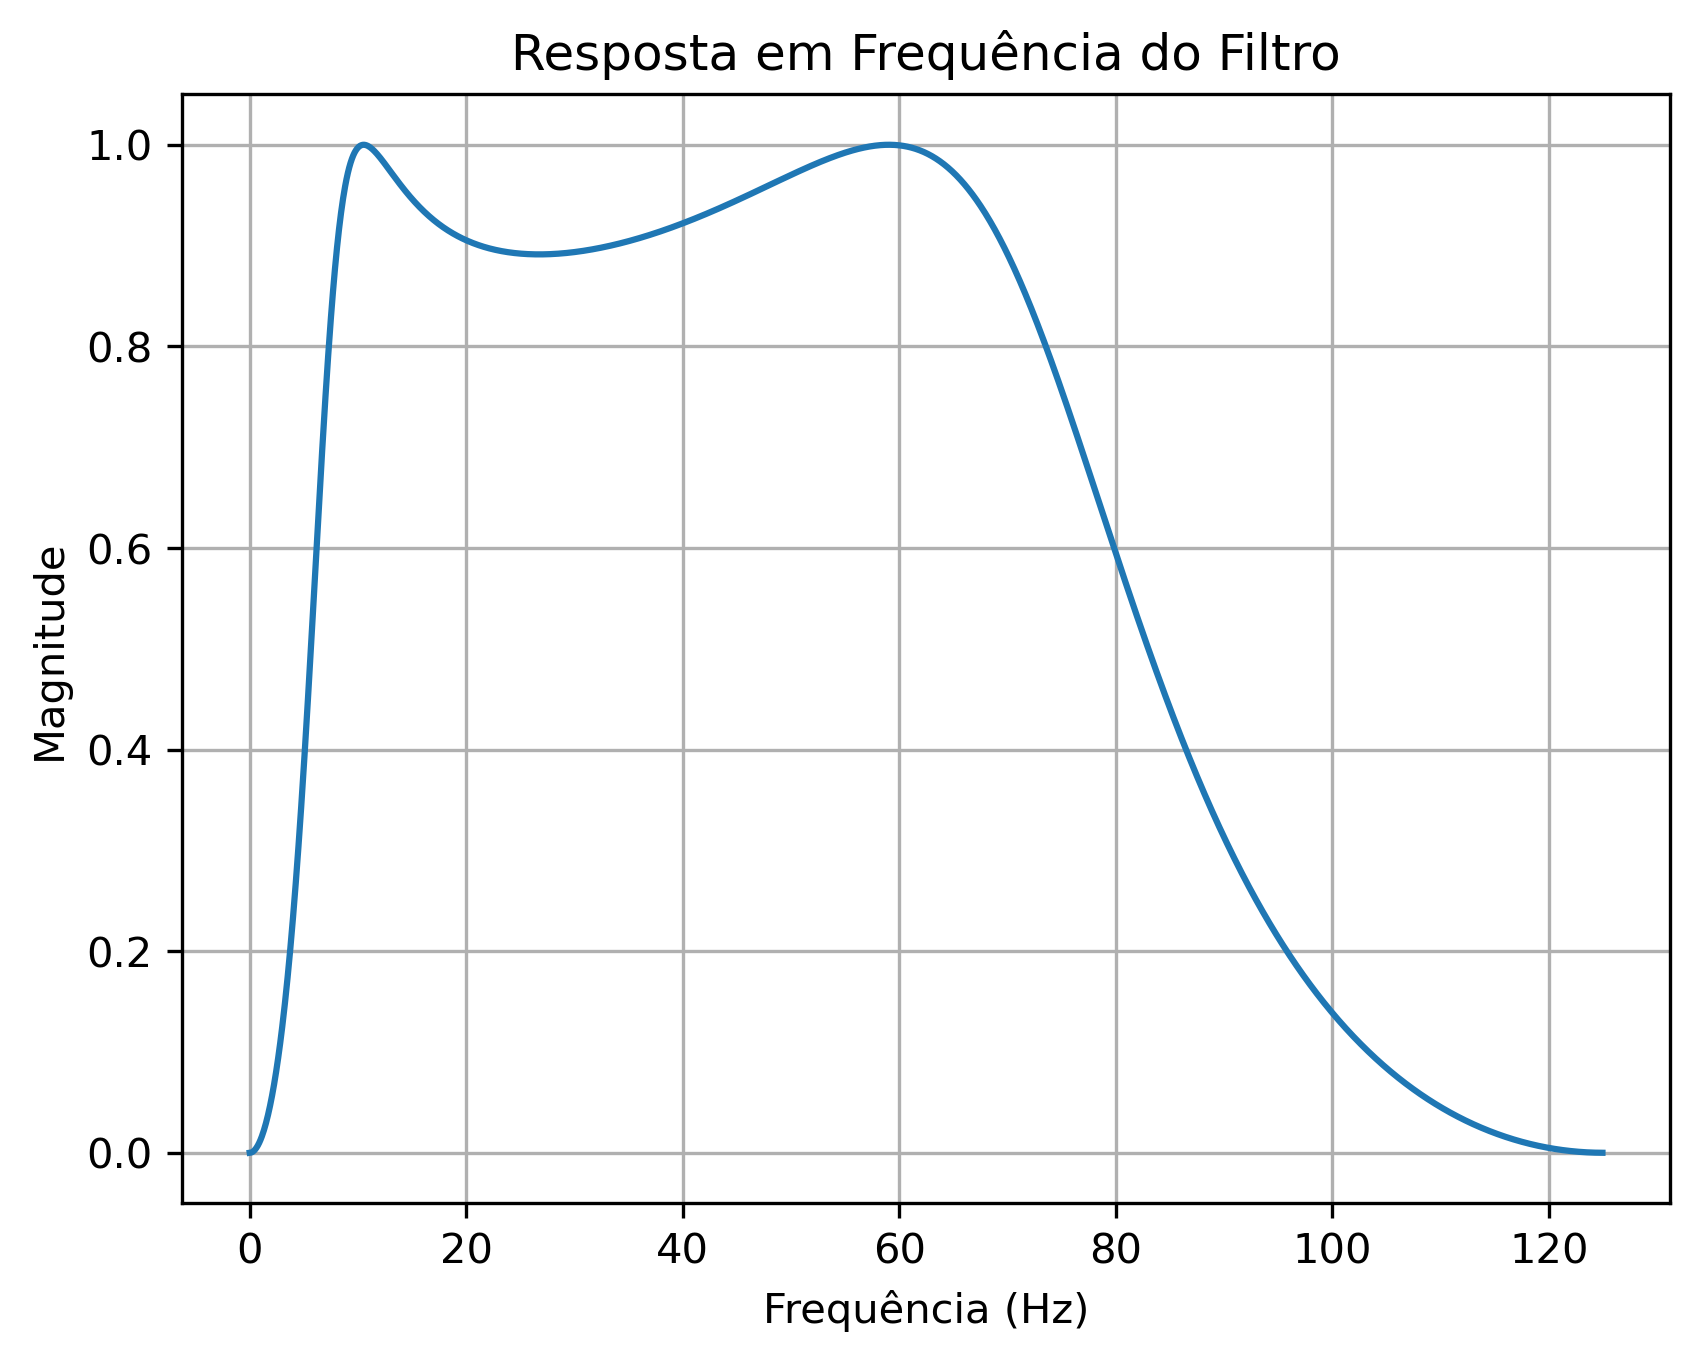

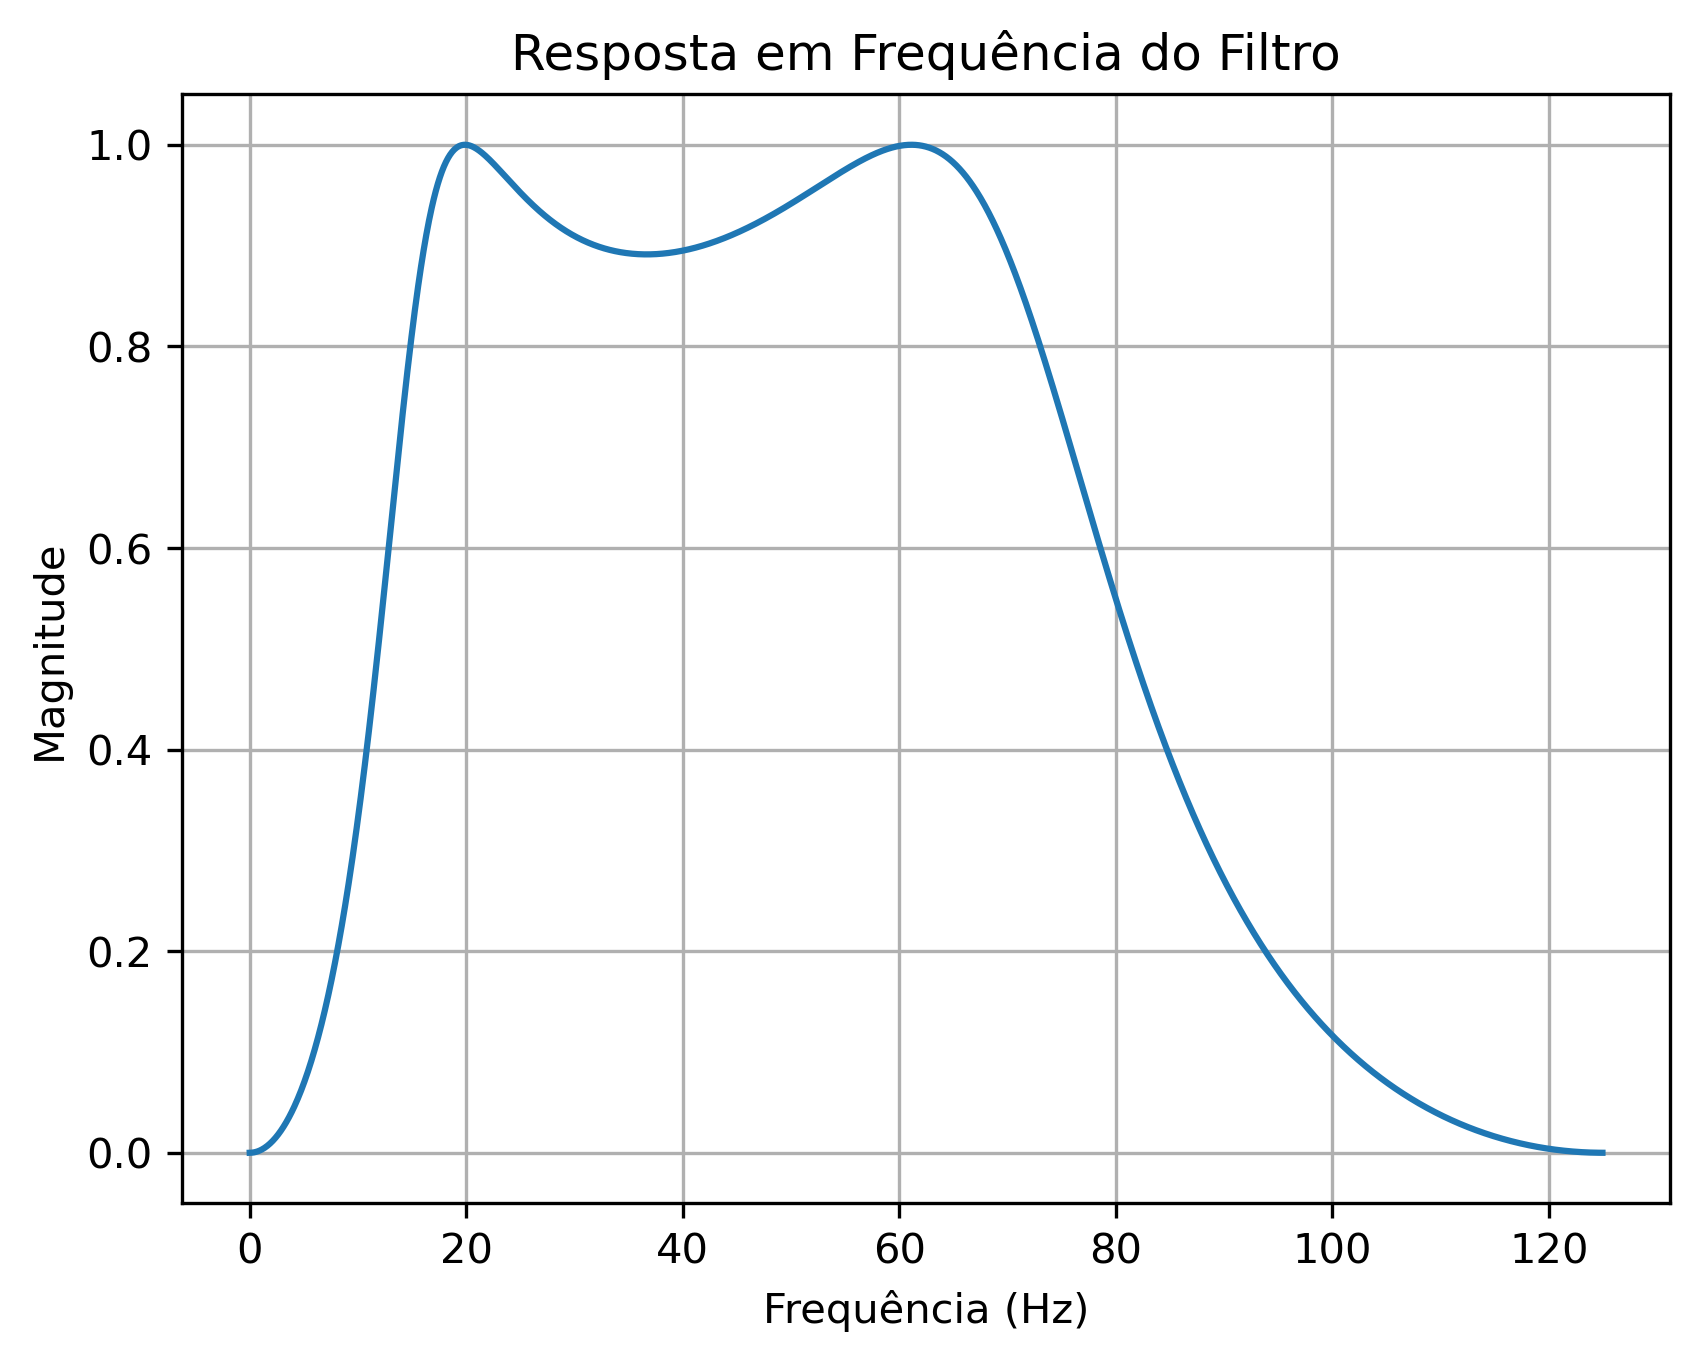

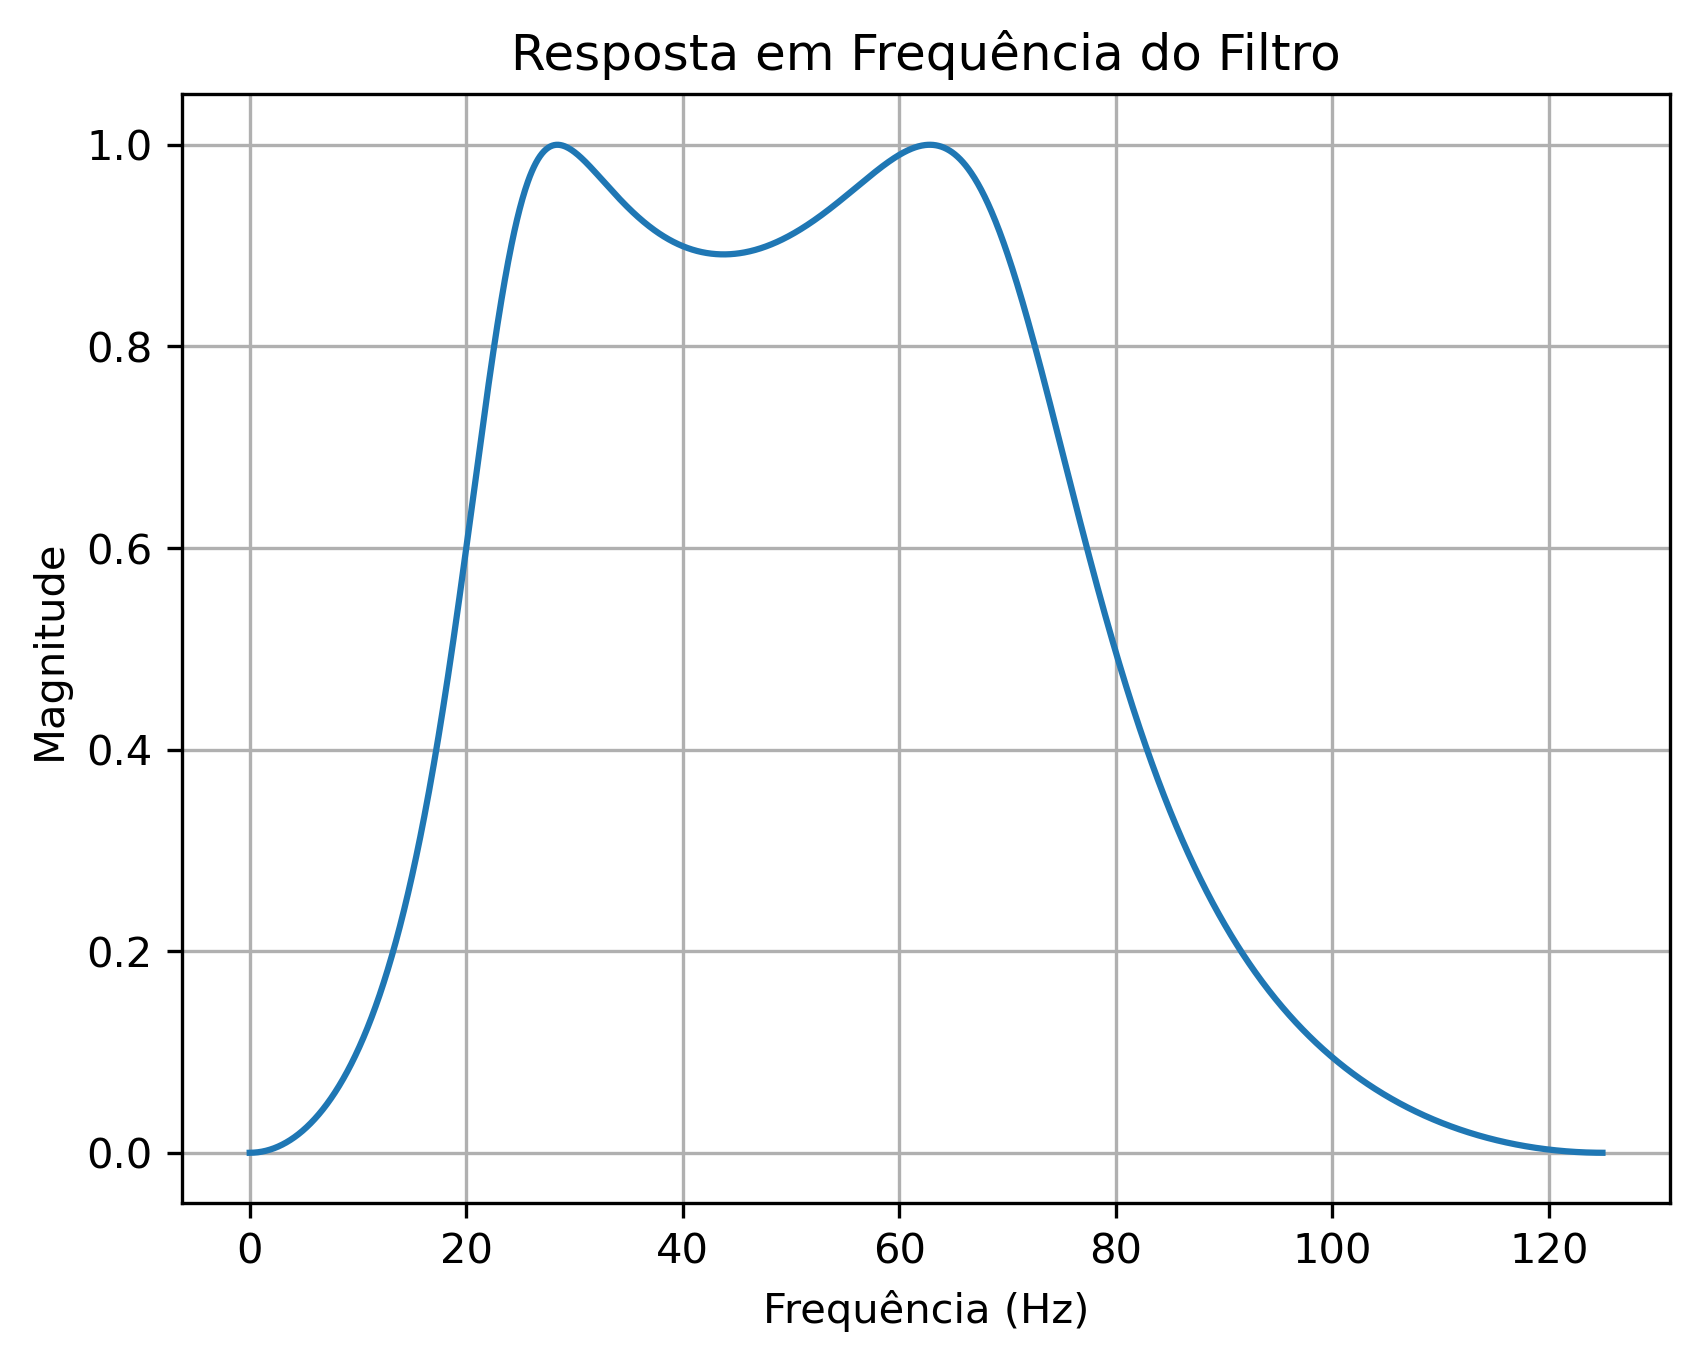

In [142]:
high_cutoff = [70] * 3
low_cutoff = [i for i in range(8, 8 * (3 + 1), 8)]
filter_order = 2
passband_ripple = 1
bp_filters = []


for i in range(3):
    b, a = cheby1(
        2,
        1,
        [low_cutoff[i], high_cutoff[i]],
        btype="band",
        fs=250,
    )
    bp_filters.append((b, a))
    plt.figure(1, dpi=300)
    w, h = freqz(b, a, worN=2000)  # Calcula a resposta em frequência
    plt.plot((250 * 0.5 / np.pi) * w, abs(h))  # Converte para Hz no eixo x
    plt.title("Resposta em Frequência do Filtro")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

In [68]:
filtered = np.load("pre_processed_3_subbands_4_classes.npy")
labels = np.load("labels_4_classes.npy")
filtered.shape

(35, 120, 3, 9, 250)

In [69]:
labels[0]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [138]:
sinal_10hz = filtered[3, -4, :, 7, :]
sinal_10hz.shape

(3, 250)

In [139]:
label = labels[3, -4]
label

3

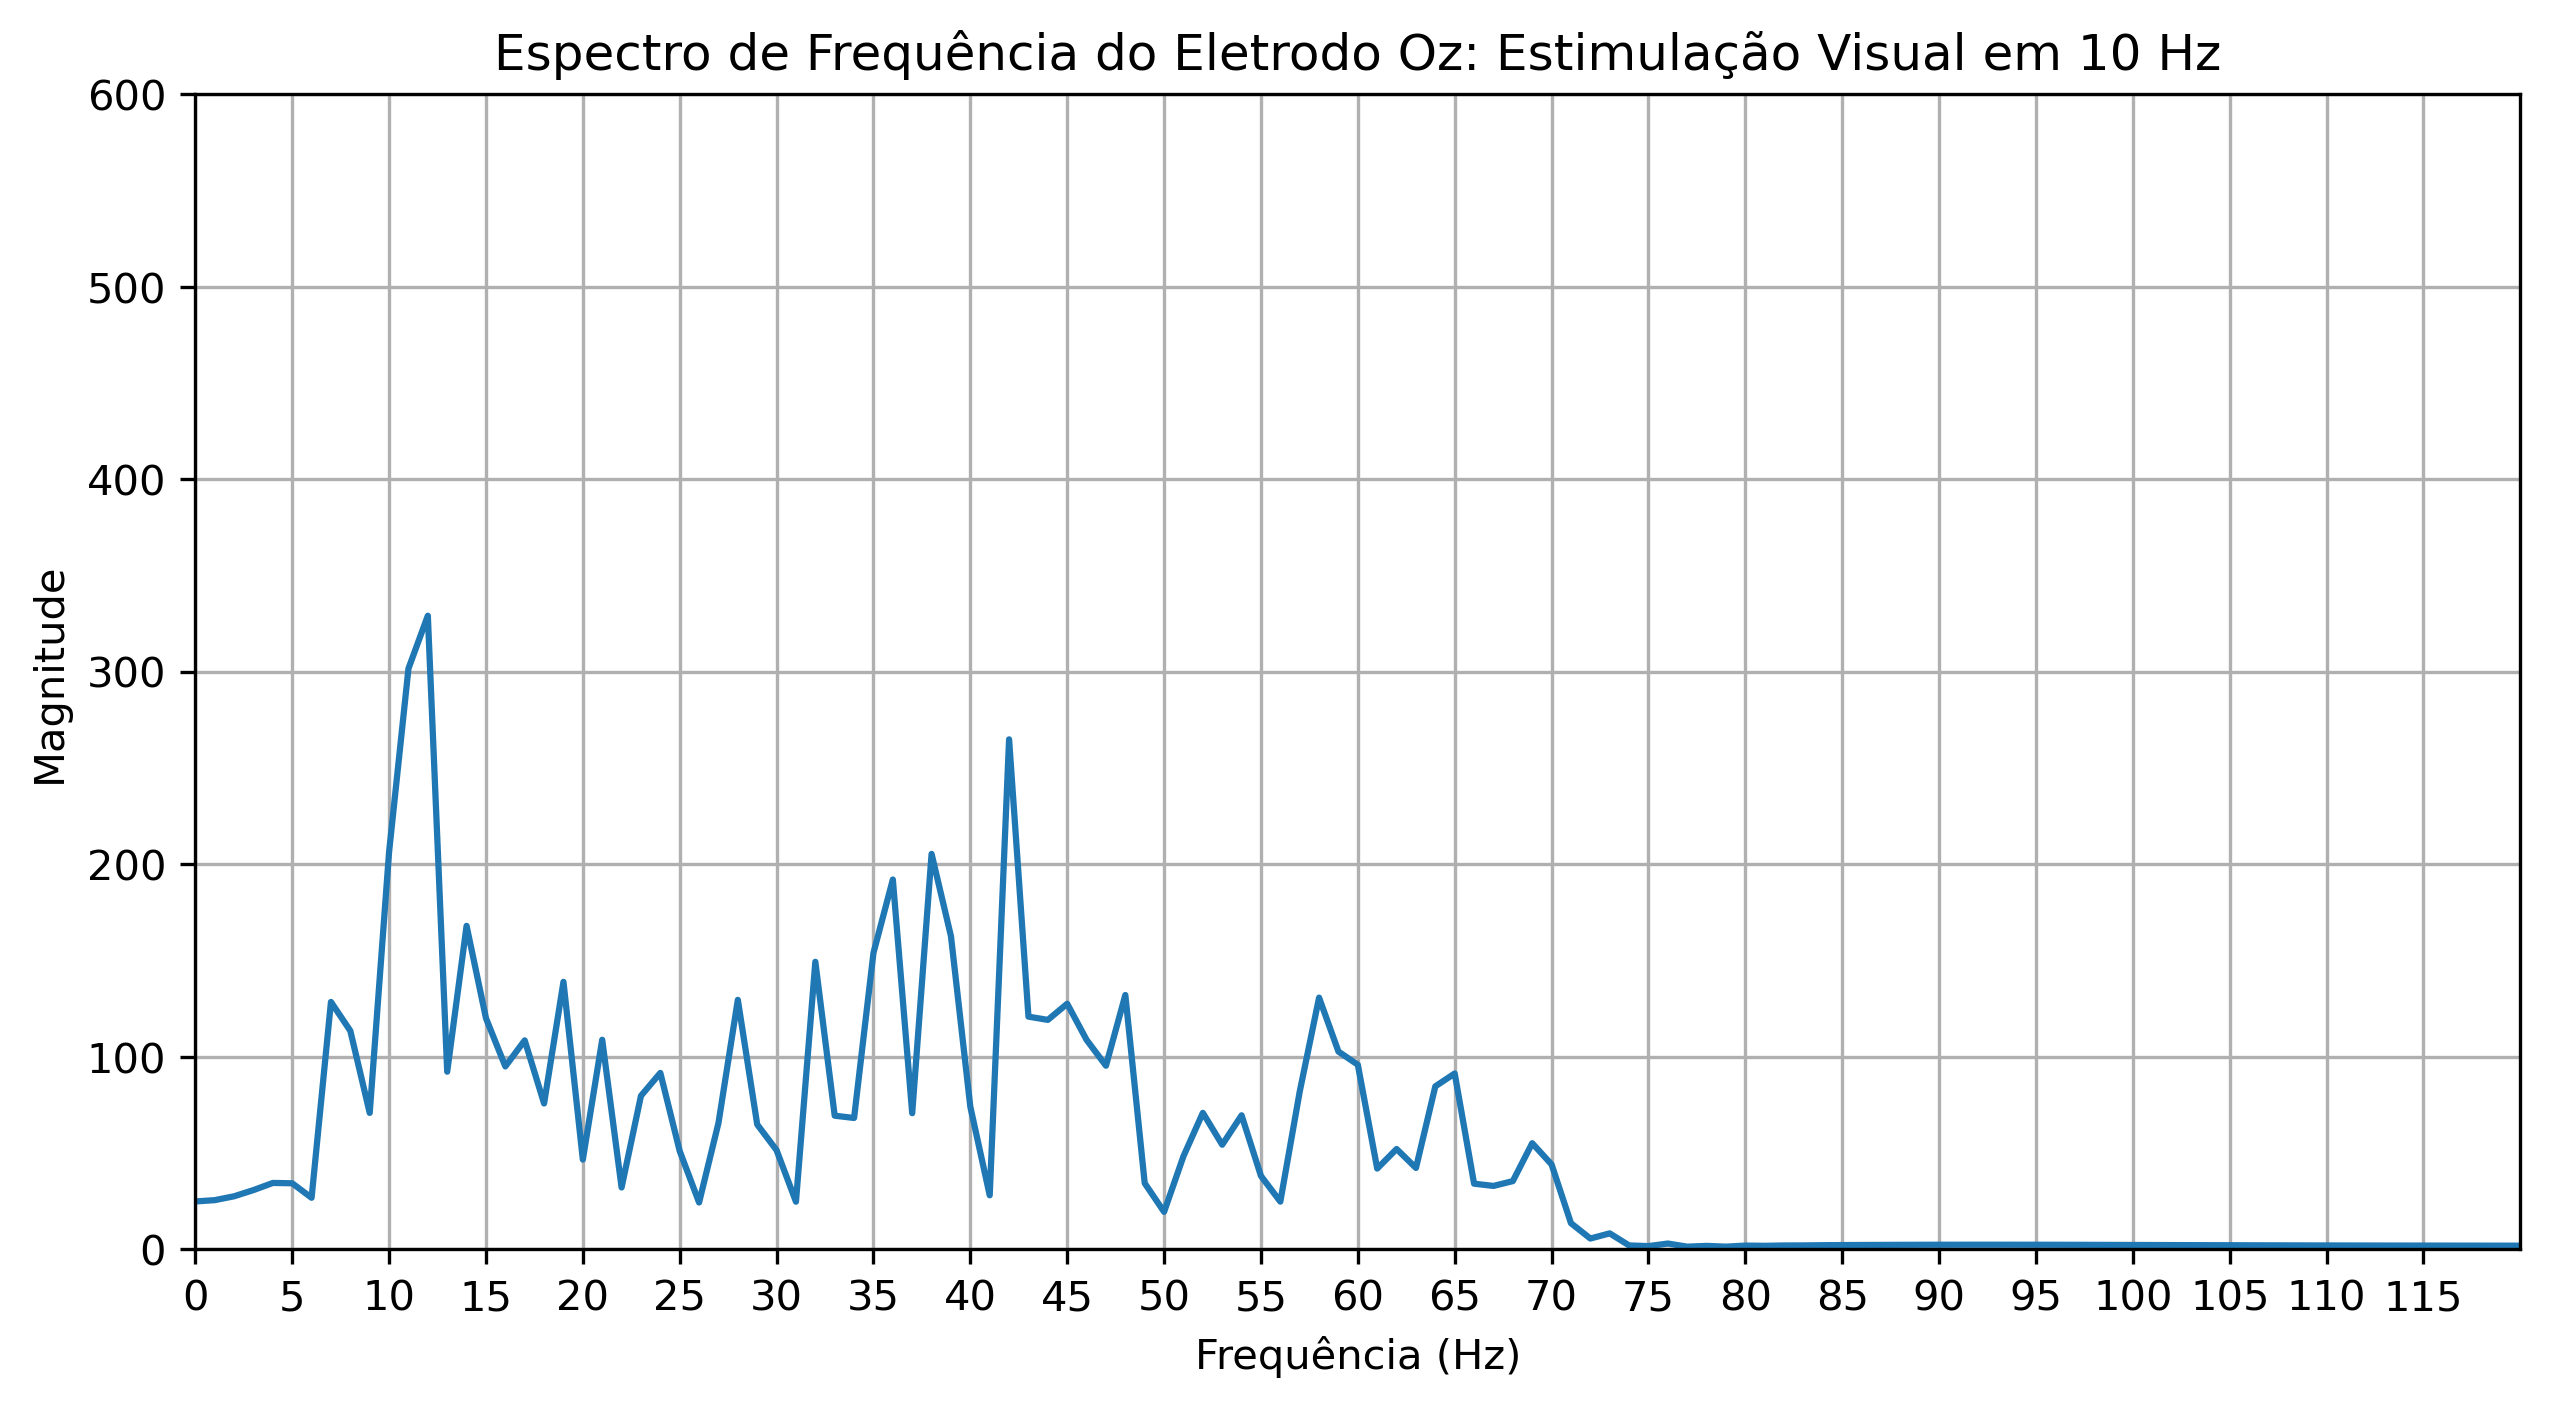

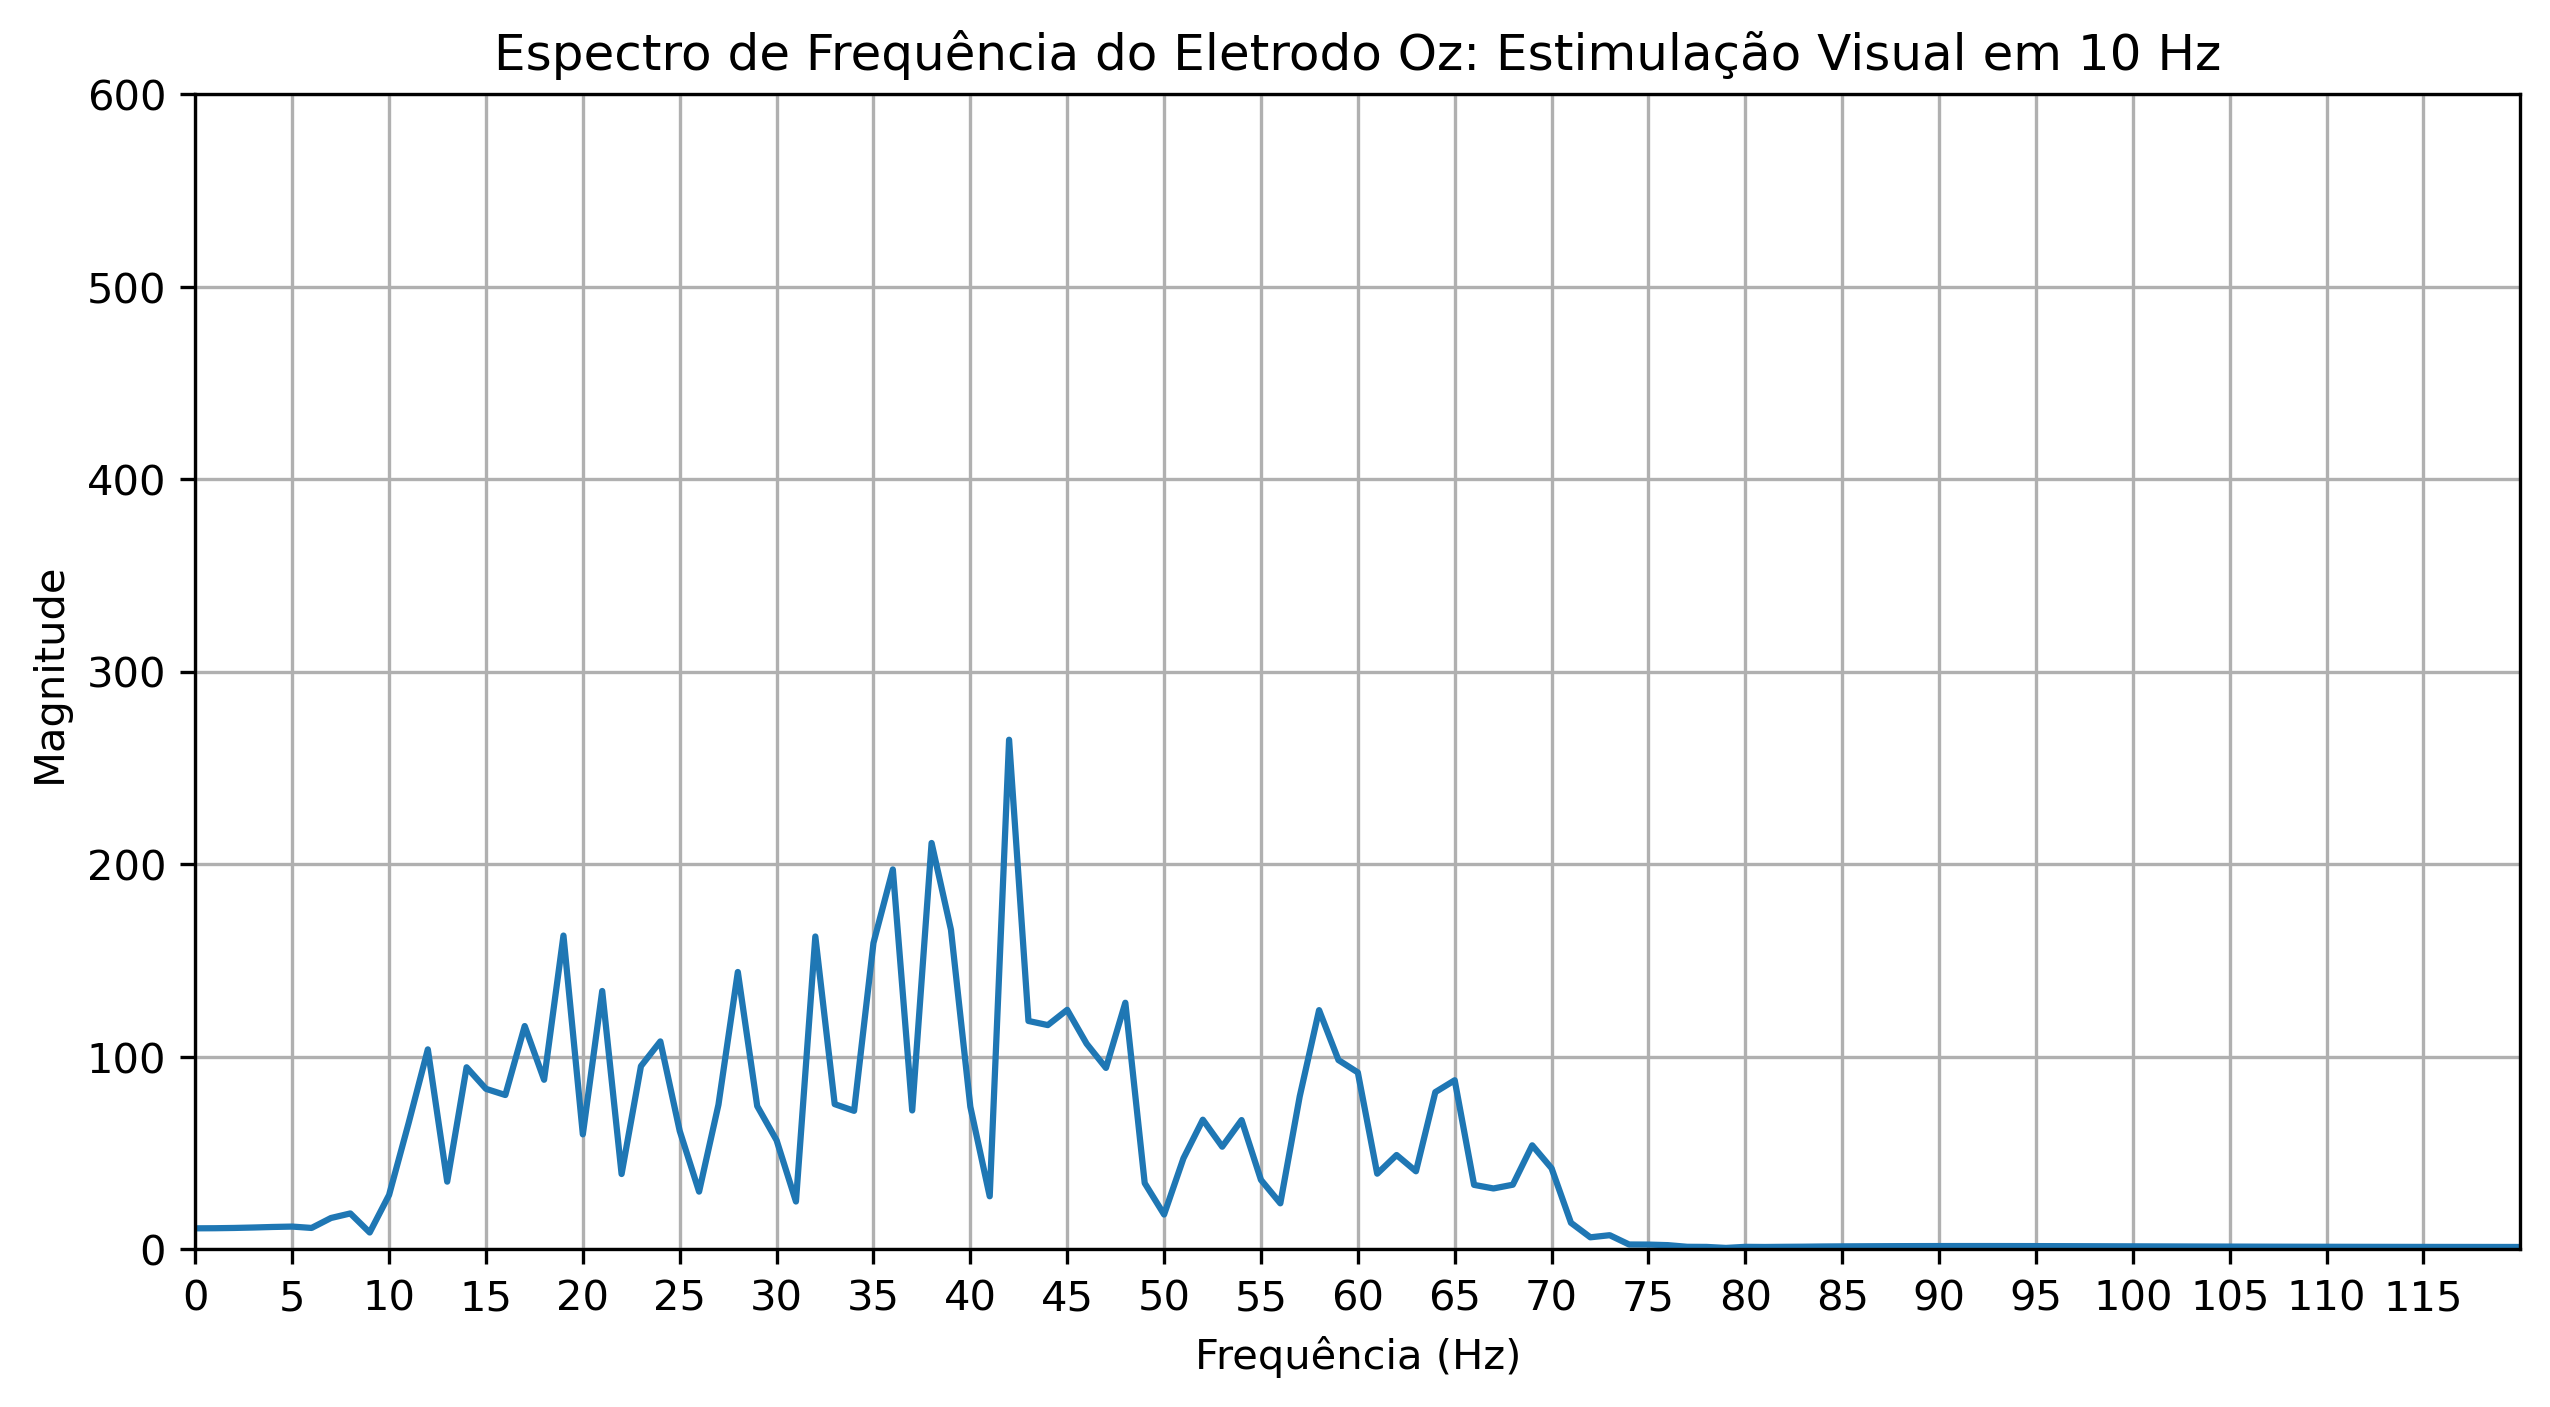

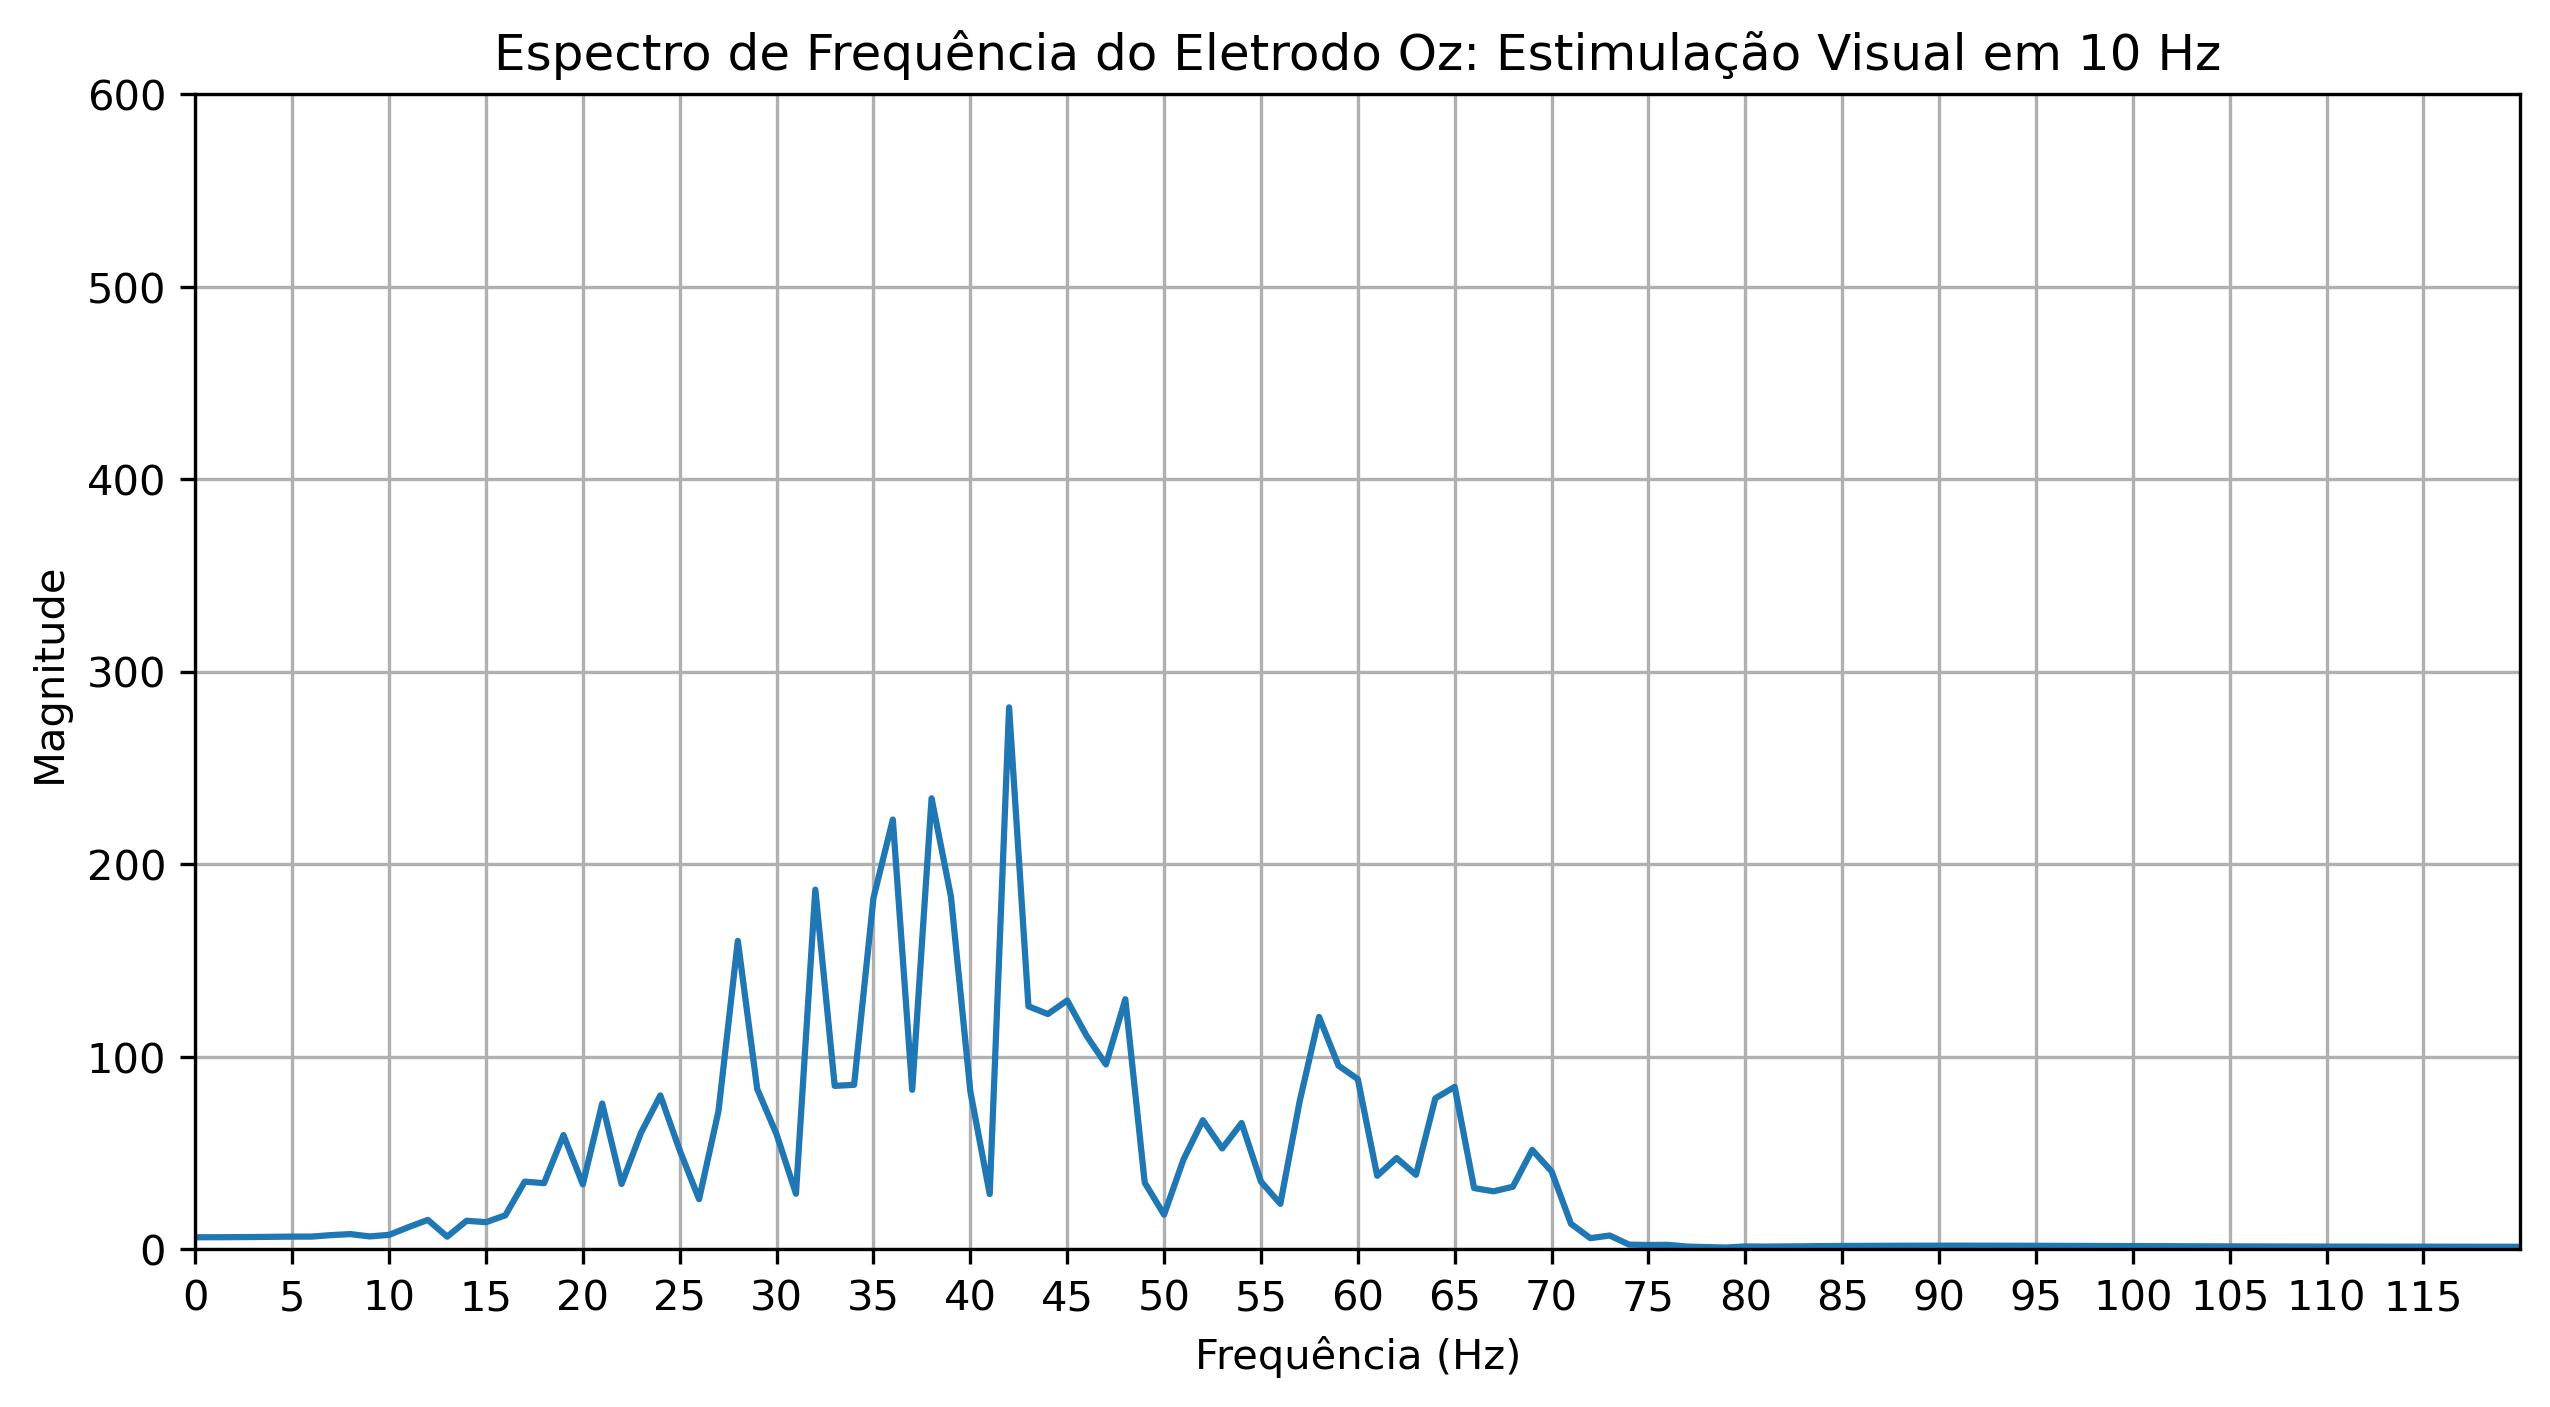

In [140]:
for i in range(3):
    fft_sinal = np.fft.fft(sinal_10hz[i, :])
    eixo_frequencias = np.fft.fftfreq(len(sinal_10hz[i, :]), d=1 / 250)
    frequencias_pos = eixo_frequencias[eixo_frequencias >= 0]
    fft_sinal_pos = np.abs(fft_sinal[eixo_frequencias >= 0])

    # Plote o espectro de frequência
    plt.figure(figsize=(10, 5), dpi=300)
    plt.plot(frequencias_pos, fft_sinal_pos)
    plt.title("Espectro de Frequência do Eletrodo Oz: Estimulação Visual em 10 Hz")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 120)
    plt.ylim(0, 600)
    plt.xticks(range(0, 120, 5))
    plt.grid()
    plt.show()